In [20]:
# Imports
import pandas as pd
import csv
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import linregress
import plotly.graph_objects as go
import scipy.stats as st
from itertools import cycle

So what could it be?
- GBP graphs
- Correlation life expectancy with gbp outcomes

In [2]:
## Read in the Data

# Create file path
file = Path('output/csv/master_dataset_oecd_countries.csv')

# Read in Data
master_df = pd.read_csv(file, encoding="UTF-8", low_memory=False)
master_df.head()

Country    Year  Life Expectancy  Population          Type  \
0  Australia  1950.0             69.0        8177  Country/Area   
1  Australia  1951.0             68.7        8420  Country/Area   
2  Australia  1952.0             69.1        8633  Country/Area   
3  Australia  1953.0             69.7        8819  Country/Area   
4  Australia  1954.0             69.9        9003  Country/Area   

   Male Population, as of 1 July (thousands)  \
0                                     4120.0   
1                                     4253.0   
2                                     4367.0   
3                                     4463.0   
4                                     4555.0   

   Female Population, as of 1 July (thousands)  \
0                                       4057.0   
1                                       4167.0   
2                                       4266.0   
3                                       4356.0   
4                                       4448.0   

   Male Life Expectancy at Birth (years)  \
0                                   66.5   
1                                   66.1   
2                                   66.5   
3                                   67.1   
4                                   67.2   

   Female Life Expectancy at Birth (years) countrycode  ...  \
0                                     71.7         AUS  ...   
1                                     71.6         AUS  ...   
2                                     72.0         AUS  ...   
3                                     72.6         AUS  ...   
4                                     72.8         AUS  ...   

  Alcohol use disorders  Cardiovascular diseases  Diabetes mellitus  \
0                   NaN                      NaN                NaN   
1                   NaN                      NaN                NaN   
2                   NaN                      NaN                NaN   
3                   NaN                      NaN                NaN   
4                   NaN                      NaN                NaN   

  Liver cancer due to alcohol use Motor vehicle road injuries  \
0                             NaN                         NaN   
1                             NaN                         NaN   
2                             NaN                         NaN   
3                             NaN                         NaN   
4                             NaN                         NaN   

   Opioid use disorders Police conflict and executions  Road injuries  \
0                   NaN                            NaN            NaN   
1                   NaN                            NaN            NaN   
2                   NaN                            NaN            NaN   
3                   NaN                            NaN            NaN   
4                   NaN                            NaN            NaN   

   Self-harm  Tracheal, bronchus, and lung cancer  
0        NaN                                  NaN  
1        NaN                                  NaN  
2        NaN                                  NaN  
3        NaN                                  NaN  
4        NaN                                  NaN  

[5 rows x 39 columns]

In [3]:
master_df.columns.tolist()

['Country',
 'Year',
 'Life Expectancy',
 'Population',
 'Type',
 'Male Population, as of 1 July (thousands)',
 'Female Population, as of 1 July (thousands)',
 'Male Life Expectancy at Birth (years)',
 'Female Life Expectancy at Birth (years)',
 'countrycode',
 'Region',
 'GDP per Capita',
 'pop',
 'Measure',
 'Unit of Measure',
 'Health Expenditure',
 'country code',
 'adjusted savings: education expenditure (current us$)',
 'current health expenditure (% of gdp)',
 'domestic credit to private sector (% of gdp)',
 'gdp (constant 2015 us$)',
 'labor force with advanced education (% of total working-age population with advanced education)',
 'labor force with intermediate education (% of total working-age population with intermediate education)',
 'labor force with basic education (% of total working-age population with basic education)',
 'market capitalization of listed domestic companies (% of gdp)',
 'military expenditure (% of gdp)',
 'out-of-pocket expenditure (% of current health

In [4]:
## Select Top 15 countries based on GDP in Latest Year
latest_year = master_df['Year'].max()
df_latest = master_df[master_df['Year'] == latest_year]

# Sort countries by GDP per capita and select the top 15 wealthiest countries
top_wealthiest_countries = df_latest.sort_values(by='GDP per Capita', ascending=False).head(15)['Country'].tolist()

# Filter the main dataset to include only these top wealthiest countries
wealthiest_df = master_df[master_df['Country'].isin(top_wealthiest_countries)]

In [5]:
wealthiest_df.head()

Country    Year  Life Expectancy  Population          Type  \
0  Australia  1950.0             69.0        8177  Country/Area   
1  Australia  1951.0             68.7        8420  Country/Area   
2  Australia  1952.0             69.1        8633  Country/Area   
3  Australia  1953.0             69.7        8819  Country/Area   
4  Australia  1954.0             69.9        9003  Country/Area   

   Male Population, as of 1 July (thousands)  \
0                                     4120.0   
1                                     4253.0   
2                                     4367.0   
3                                     4463.0   
4                                     4555.0   

   Female Population, as of 1 July (thousands)  \
0                                       4057.0   
1                                       4167.0   
2                                       4266.0   
3                                       4356.0   
4                                       4448.0   

   Male Life Expectancy at Birth (years)  \
0                                   66.5   
1                                   66.1   
2                                   66.5   
3                                   67.1   
4                                   67.2   

   Female Life Expectancy at Birth (years) countrycode  ...  \
0                                     71.7         AUS  ...   
1                                     71.6         AUS  ...   
2                                     72.0         AUS  ...   
3                                     72.6         AUS  ...   
4                                     72.8         AUS  ...   

  Alcohol use disorders  Cardiovascular diseases  Diabetes mellitus  \
0                   NaN                      NaN                NaN   
1                   NaN                      NaN                NaN   
2                   NaN                      NaN                NaN   
3                   NaN                      NaN                NaN   
4                   NaN                      NaN                NaN   

  Liver cancer due to alcohol use Motor vehicle road injuries  \
0                             NaN                         NaN   
1                             NaN                         NaN   
2                             NaN                         NaN   
3                             NaN                         NaN   
4                             NaN                         NaN   

   Opioid use disorders Police conflict and executions  Road injuries  \
0                   NaN                            NaN            NaN   
1                   NaN                            NaN            NaN   
2                   NaN                            NaN            NaN   
3                   NaN                            NaN            NaN   
4                   NaN                            NaN            NaN   

   Self-harm  Tracheal, bronchus, and lung cancer  
0        NaN                                  NaN  
1        NaN                                  NaN  
2        NaN                                  NaN  
3        NaN                                  NaN  
4        NaN                                  NaN  

[5 rows x 39 columns]

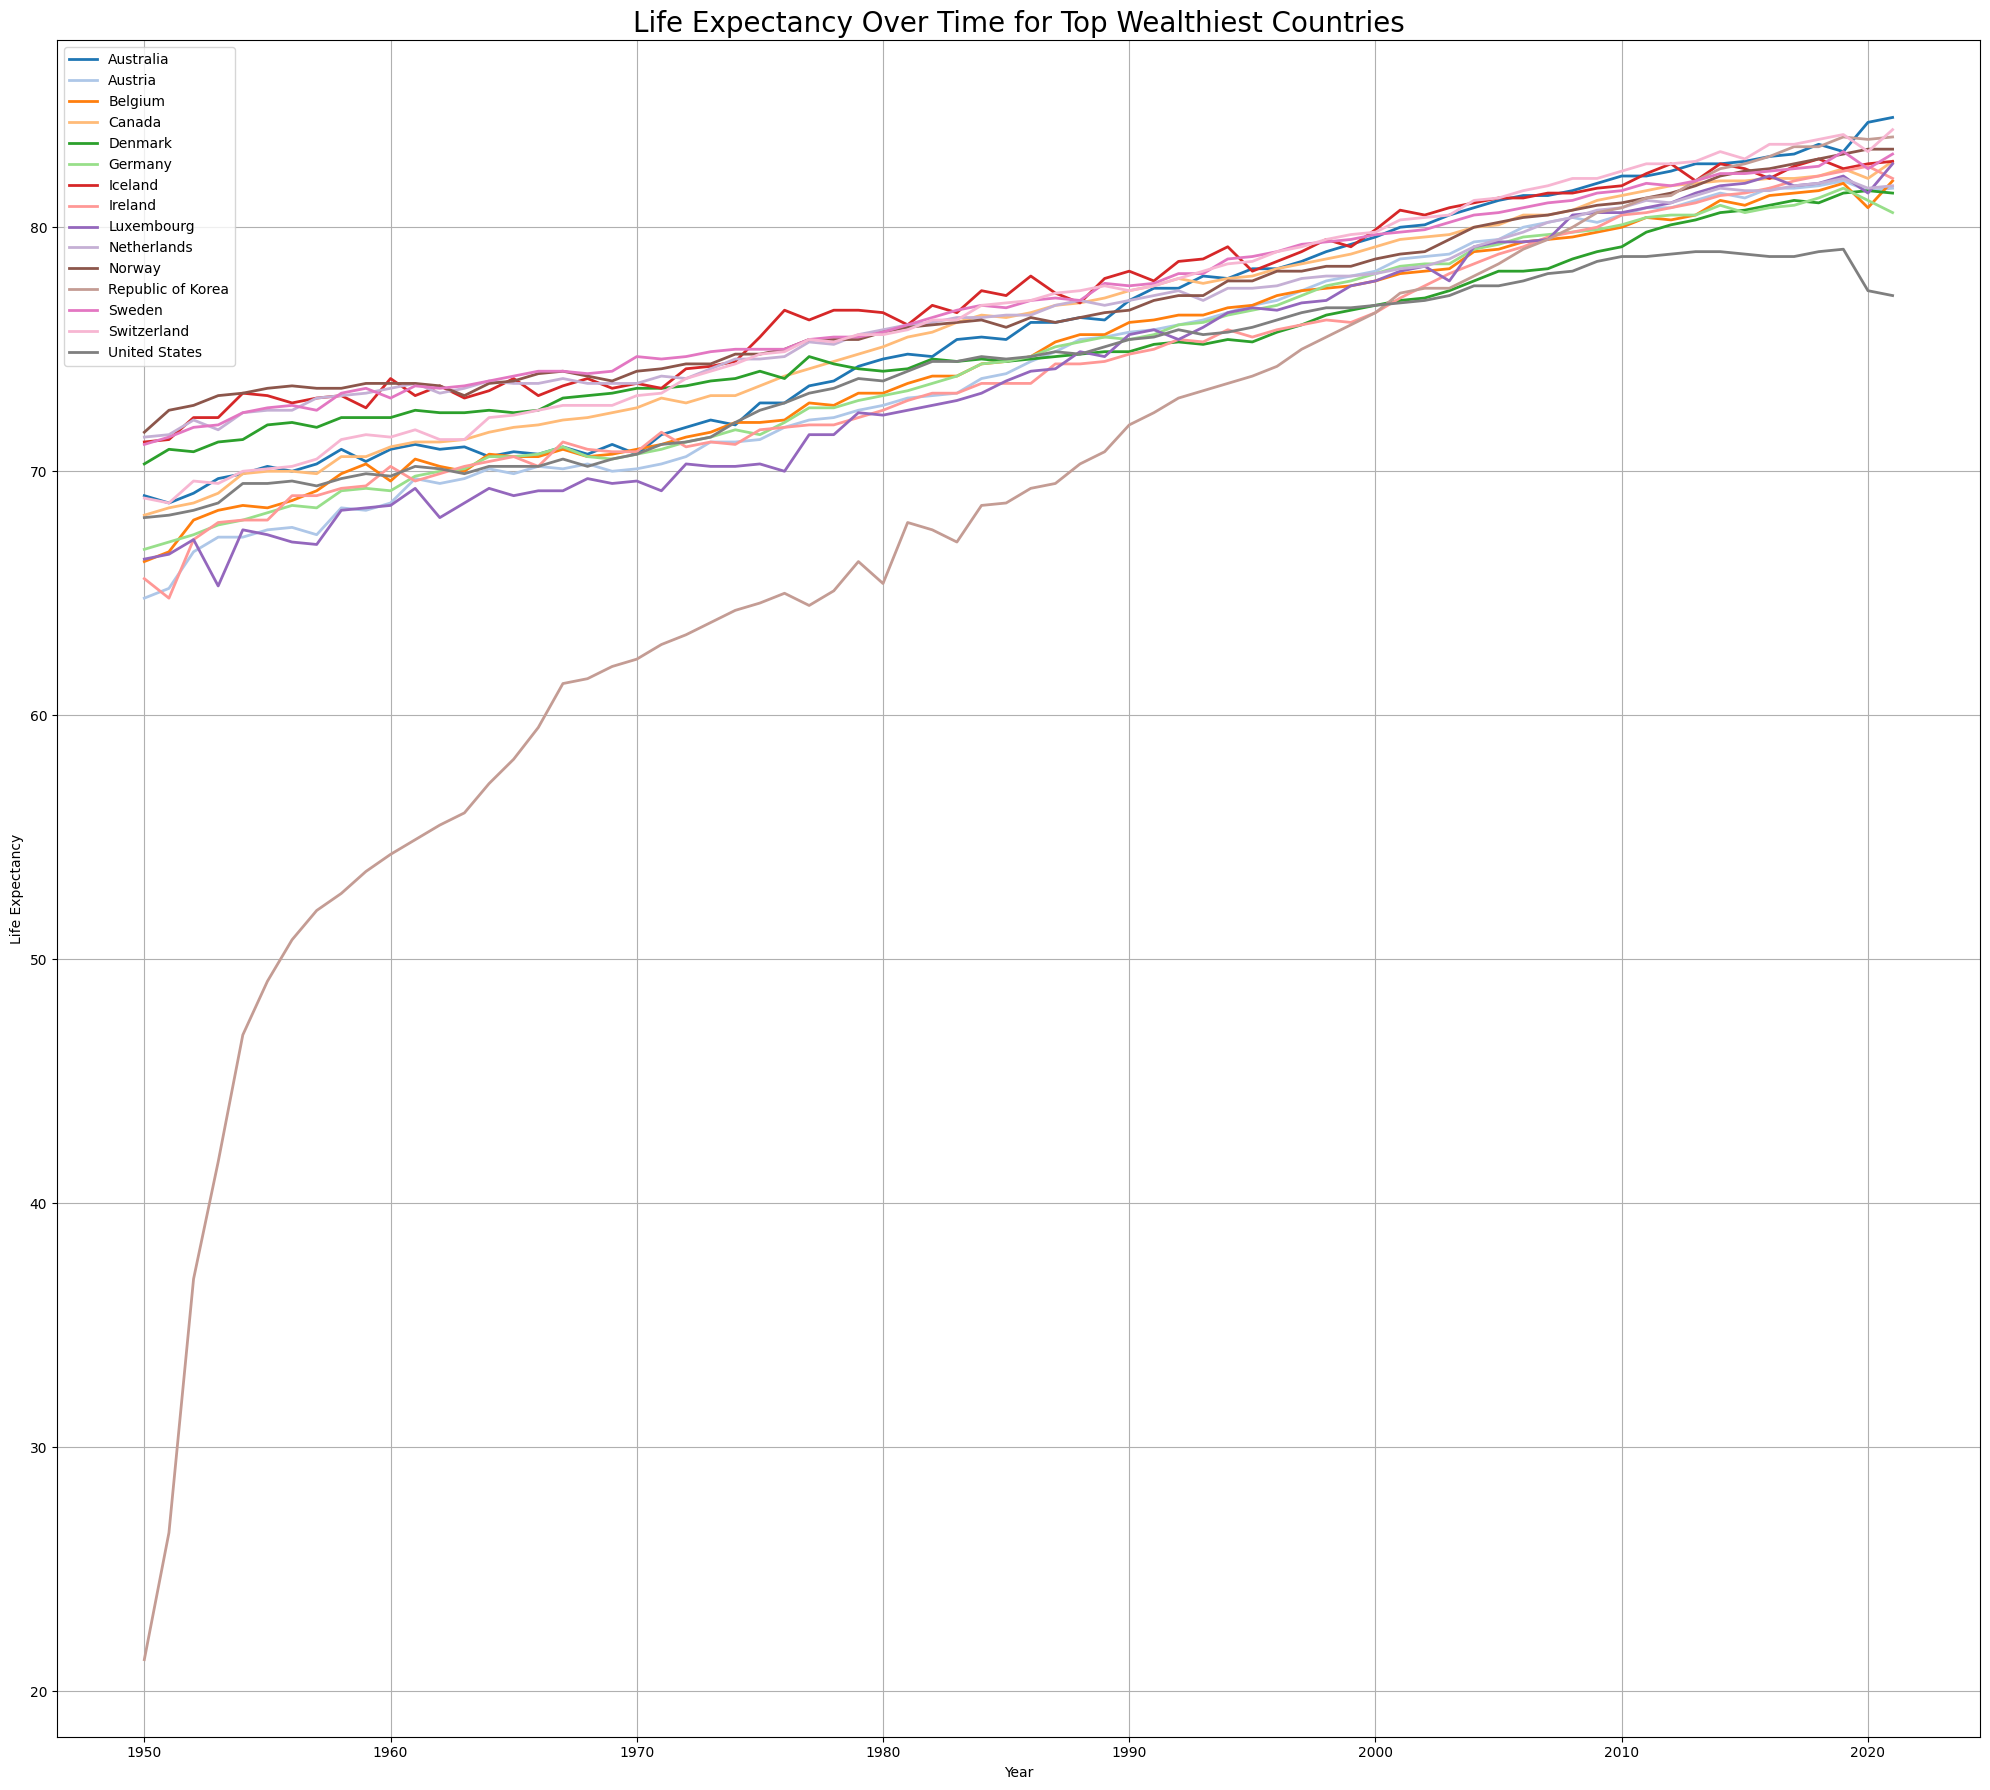

In [33]:
# Create a line chart for life expectancy over years for each country
plt.figure(figsize=(20, 18))

# Get a cycle of colors to use for each country
color_cycle = cycle(plt.cm.tab20.colors)  # You can change the colormap as per your preference

# Group by country and iterate over each group to plot
for country, group in wealthiest_df.groupby('Country'):
    color = next(color_cycle)
    plt.plot(group['Year'], group['Life Expectancy'], label=country, color=color, linewidth=2)

plt.title('Life Expectancy Over Time for Top 15 Wealthiest Countries', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
create graph of year vs life expectancy for wealthiest_df for 

In [6]:
# ## Create subplots for different gbp outcomes

# # Select columns in different categories for plotting
# addiction = ['Alcohol use disorders', 'Opioid use disorders', 'Liver cancer due to alcohol use']
# injuries = ['Police conflict and executions','Road injuries', 'Self-harm']
# disease = ['Cardiovascular diseases', 'Diabetes mellitus', 'Tracheal, bronchus, and lung cancer']
# categories = [addiction, injuries, disease]

# # Create subplots
# fig, axs = plt.subplots(3, 3, figsize=(16, 12), layout="constrained", gridspec_kw={'hspace': 0.4})

# # Titles for each row
# row_titles = ['Addiction', 'Disease', 'Injuries']

# # Get a qualitative colormap with enough colors for all countries
# cmap = plt.cm.tab20

# # Plot function for each category
# def plot_category_subplots(category, row_index):
#     handles = {}  # To store legend handles and ensure uniqueness
#     labels = []   # To store legend labels
    
#     for i, column in enumerate(category):
#         for j, country in enumerate(wealthiest_df['Country'].unique()):
#             country_data = wealthiest_df[wealthiest_df['Country'] == country]
#             color = cmap(j % cmap.N)  # Use j as index for colormap to get distinct colors for each country
#             line, = axs[row_index, i].plot(country_data['Year'], country_data[column], label=country, color=color)
            
#             # Store the first handle and label to avoid duplicates in legend
#             if country not in handles:
#                 handles[country] = line
#                 labels.append(country)
        
#         axs[row_index, i].set_title(column)
#         axs[row_index, 0].set_ylabel('Number of Deaths')

#     return handles, labels

# # Plot for each category and collect handles/labels
# legend_handles, legend_labels = {}, []
# for idx, category in enumerate(categories):
#     handles, labels = plot_category_subplots(category, idx)
#     legend_handles.update(handles)
#     legend_labels.extend(labels)

# # Set row titles
# for i in range(3):
#     axs[i, 1].annotate(row_titles[i], xy=(0.5, 1.15), xytext=(0, 10),
#                        xycoords='axes fraction', textcoords='offset points',
#                        size='large', ha='center', va='baseline')

# # Add single legend outside subplots, position lower center with additional space below subplots
# fig.legend(legend_handles.values(), legend_labels, loc='lower center', ncol=5, fontsize='medium', bbox_to_anchor=(0.5, -0.05))

# plt.tight_layout(rect=[0, 0, 0.2, 0.2])  # Adjust the rect parameter to leave space for the legend
# plt.show()

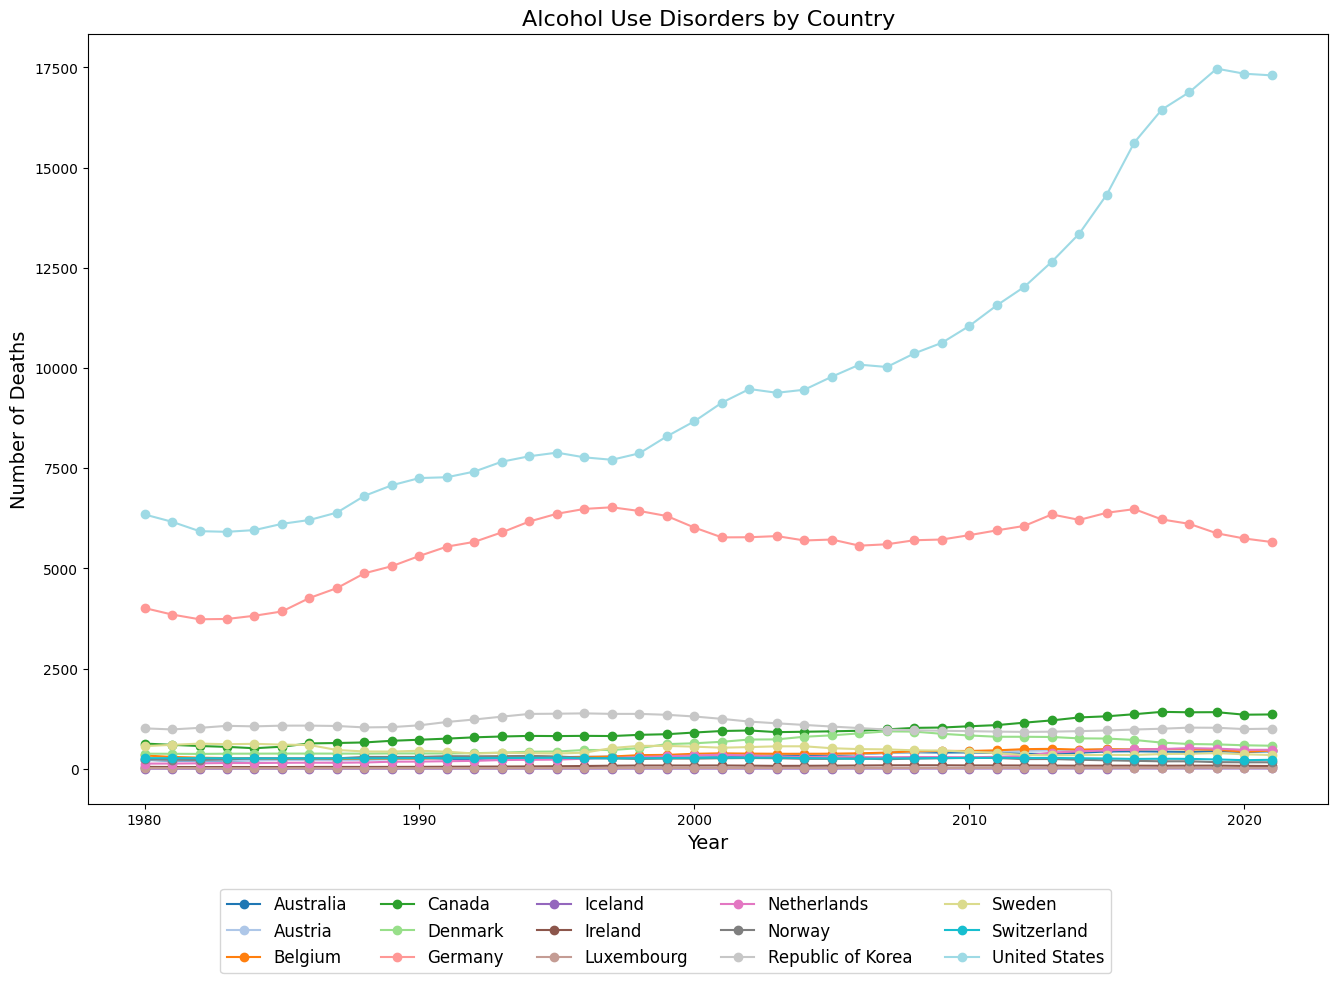

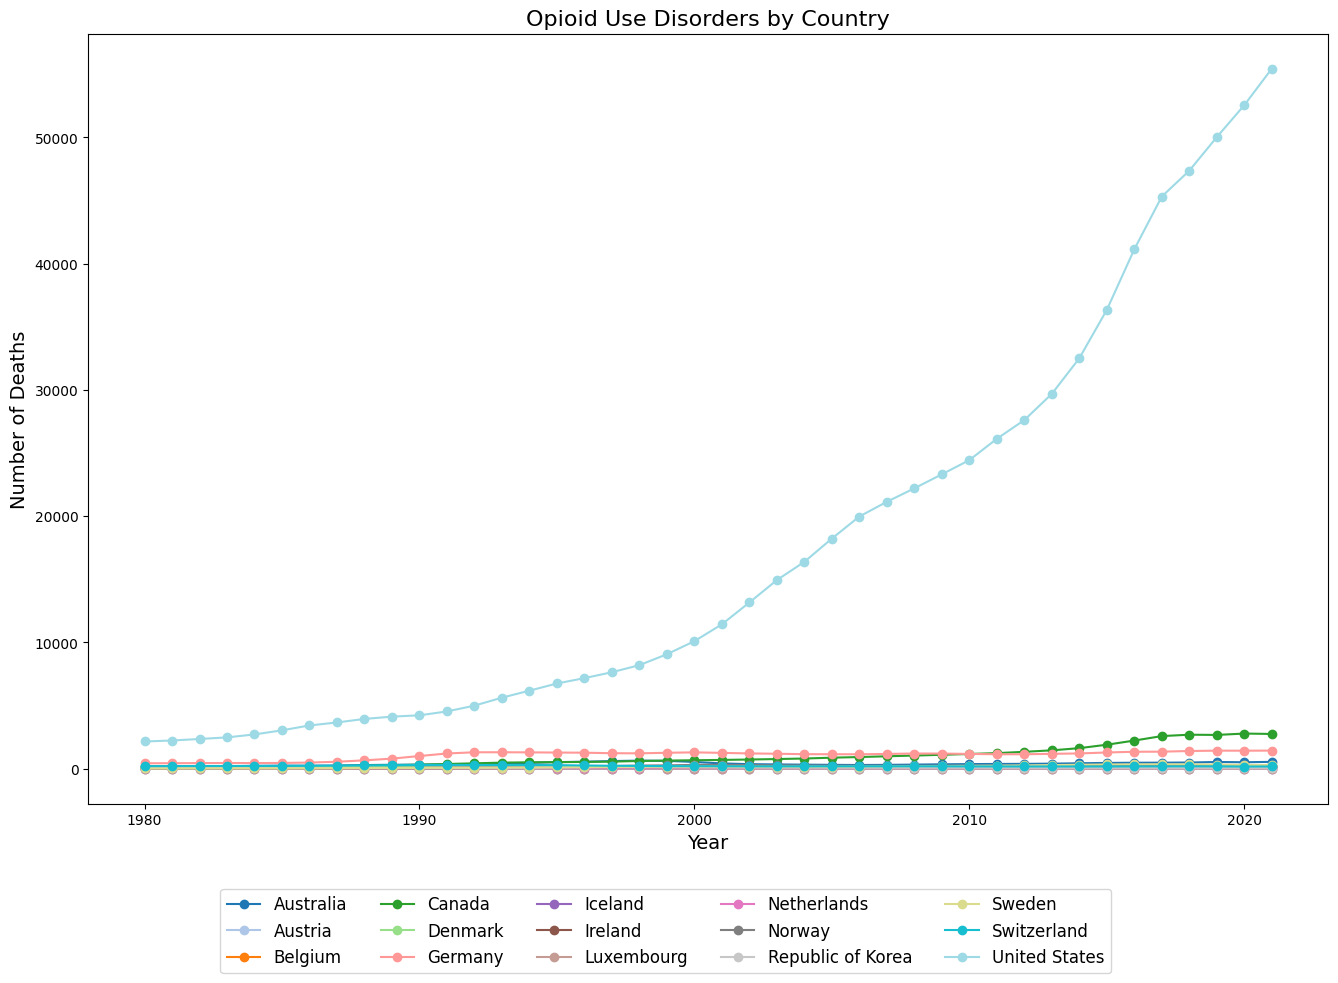

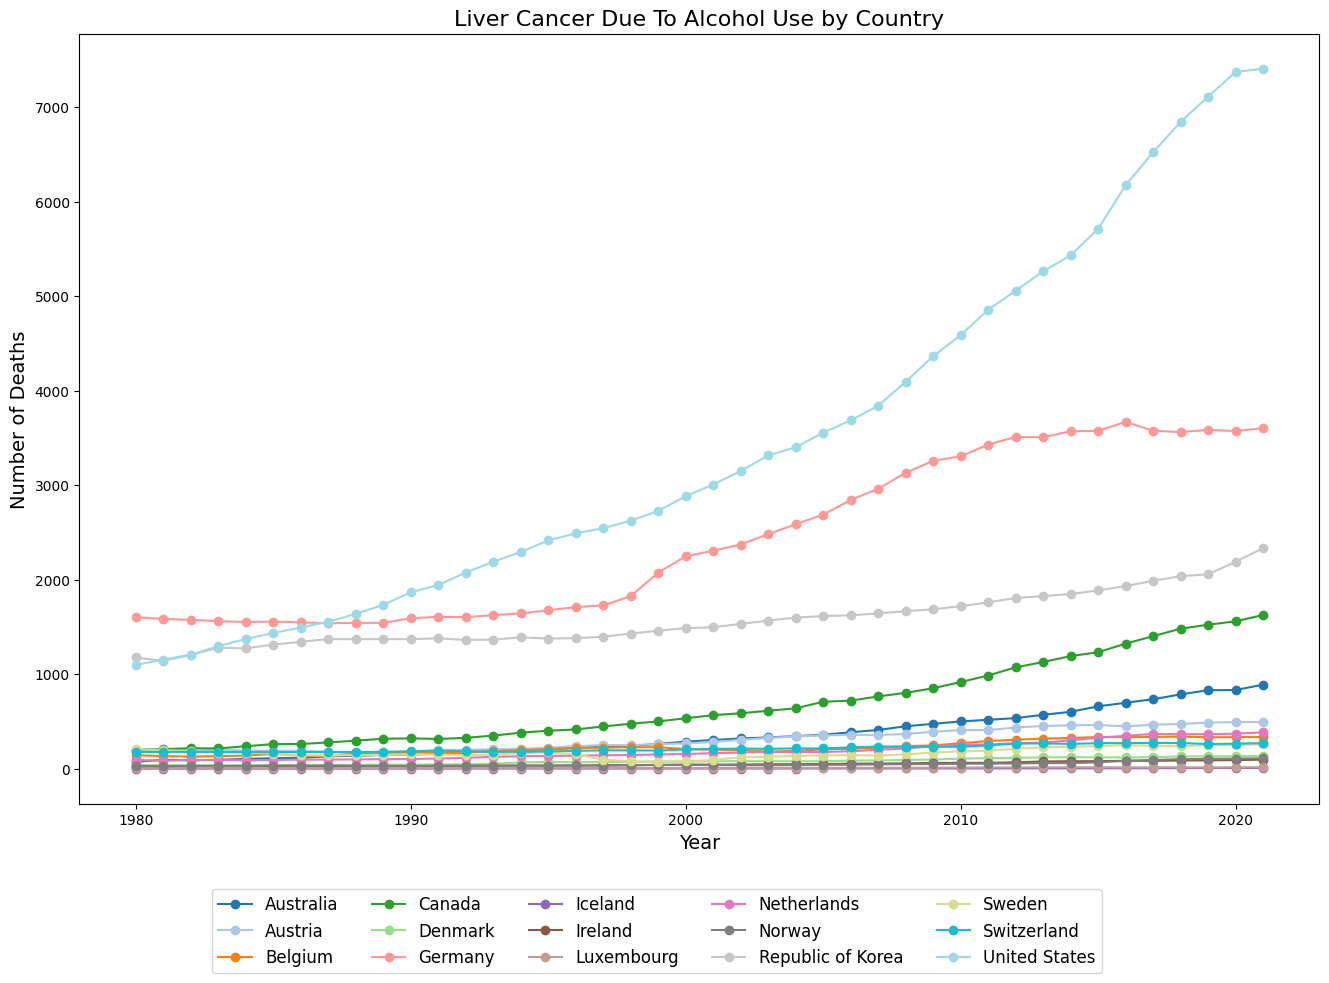

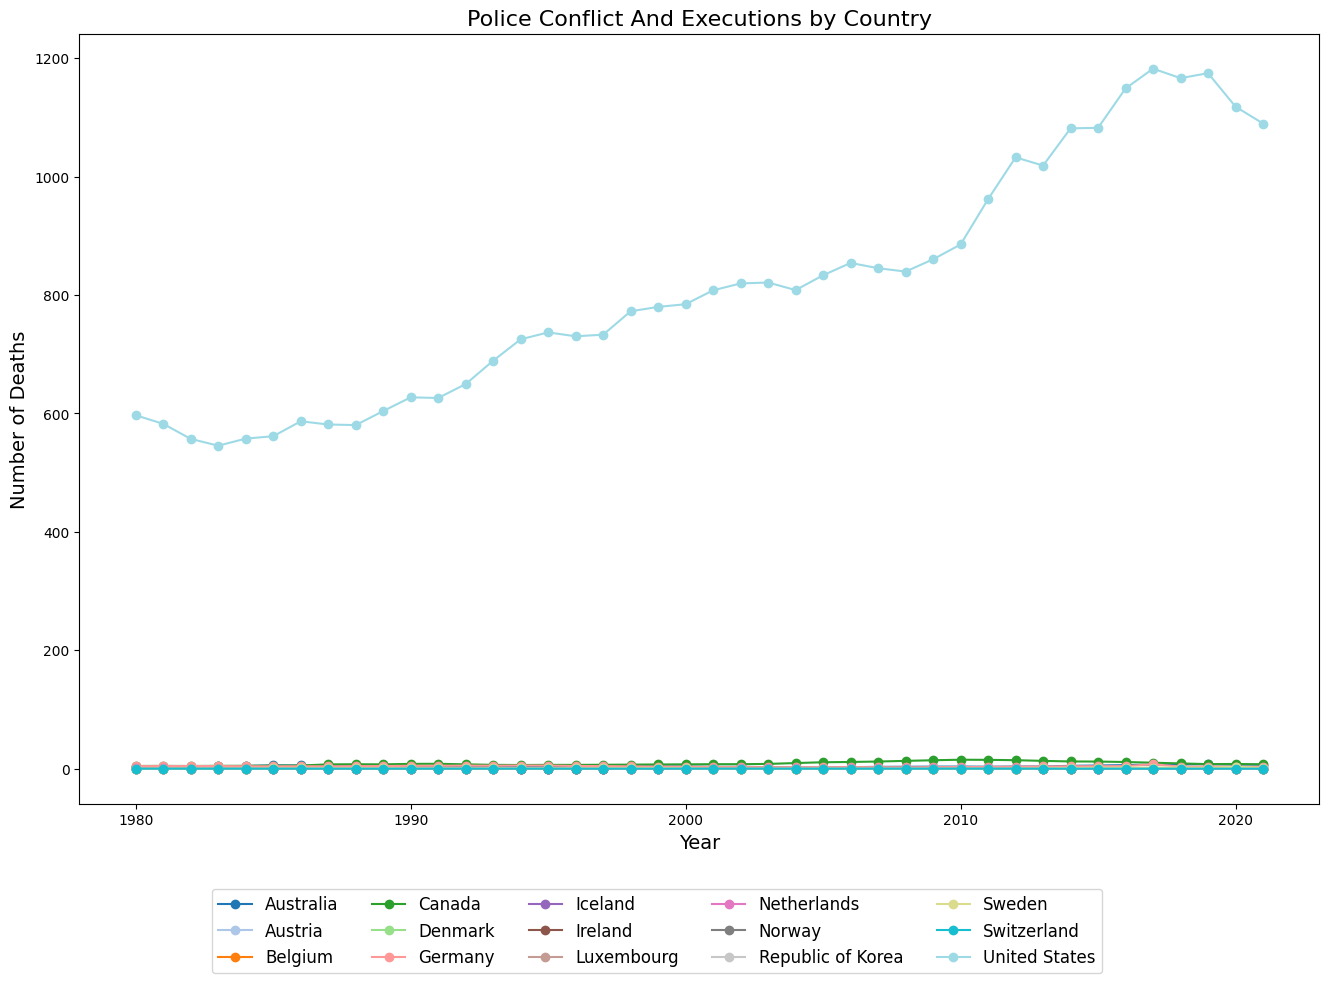

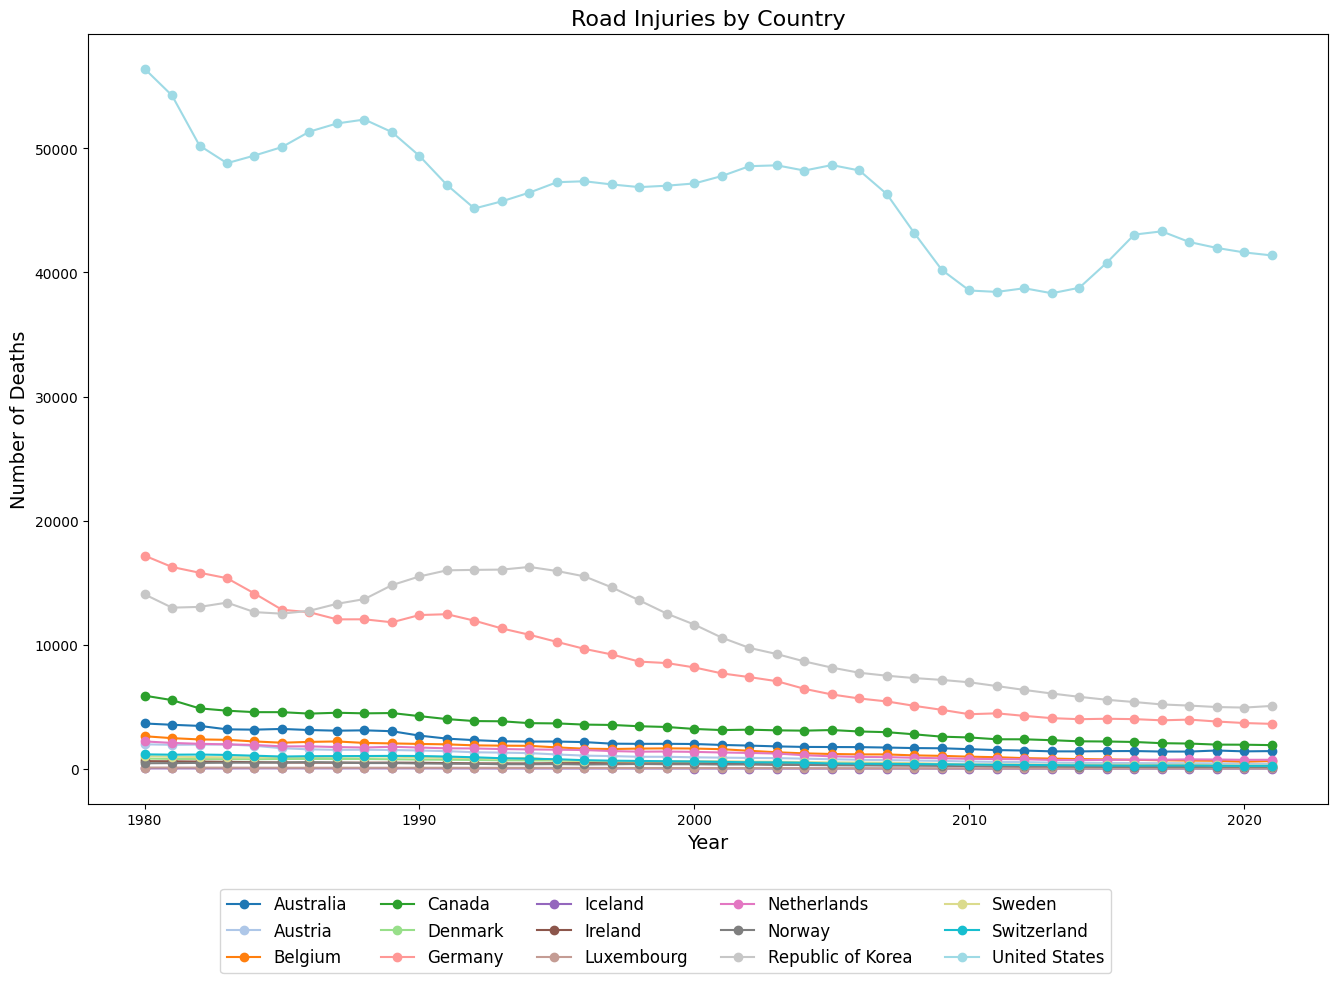

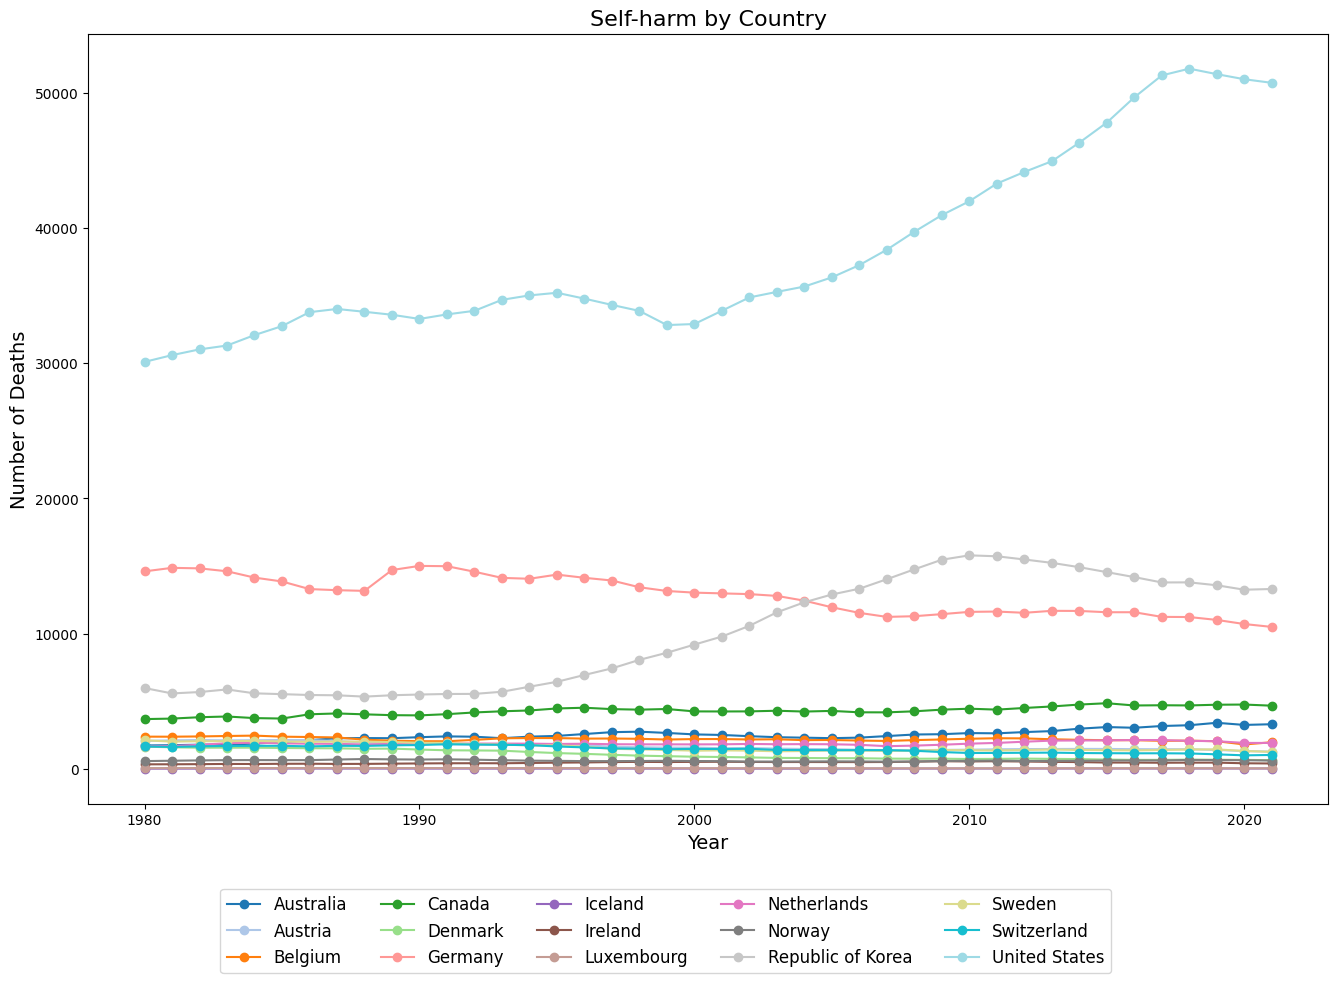

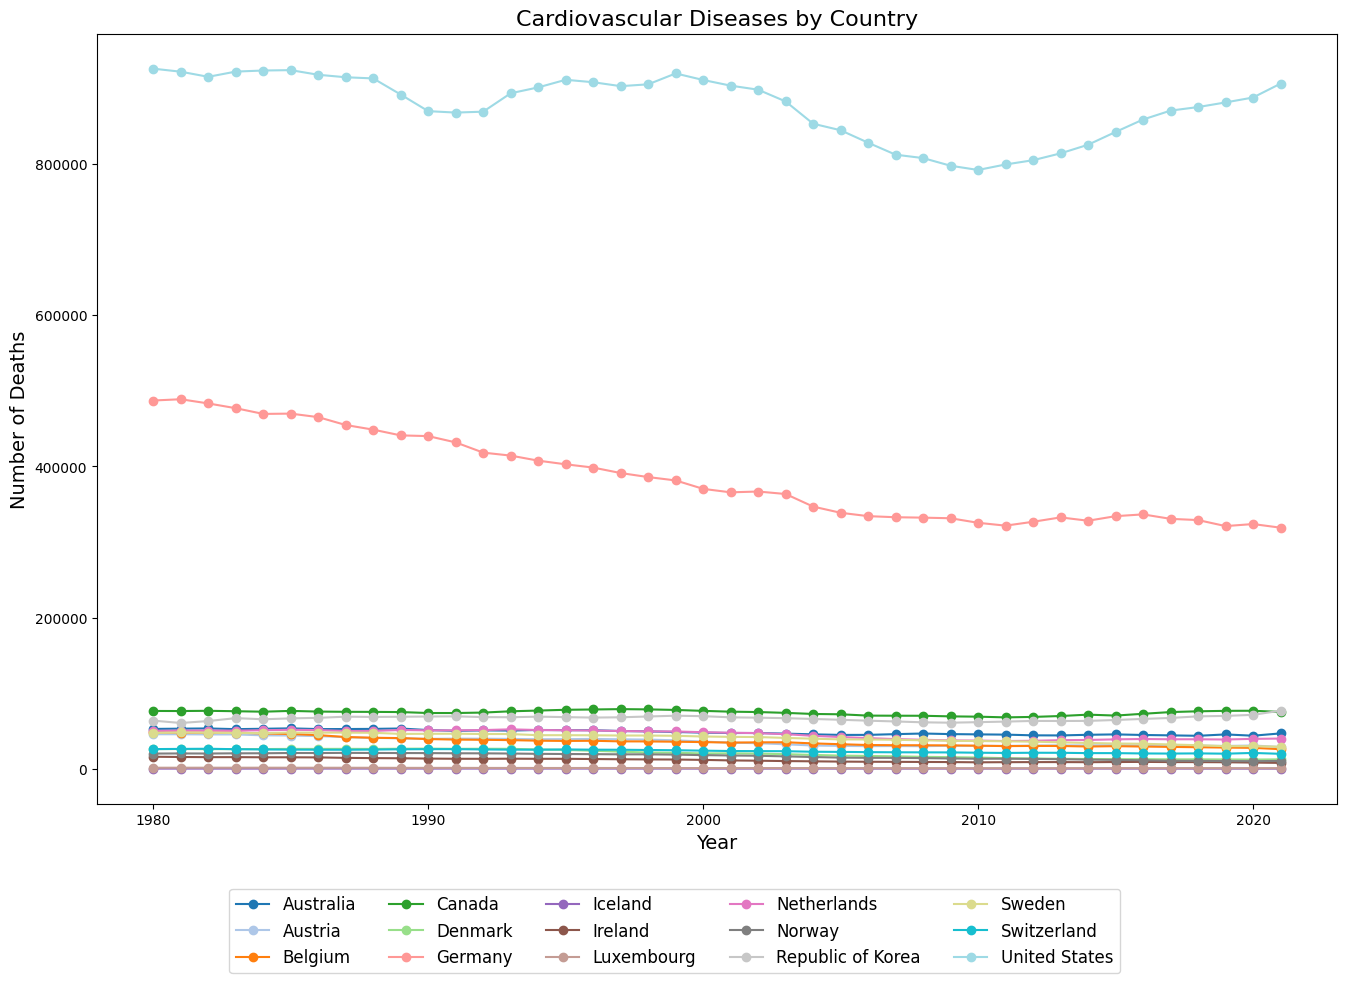

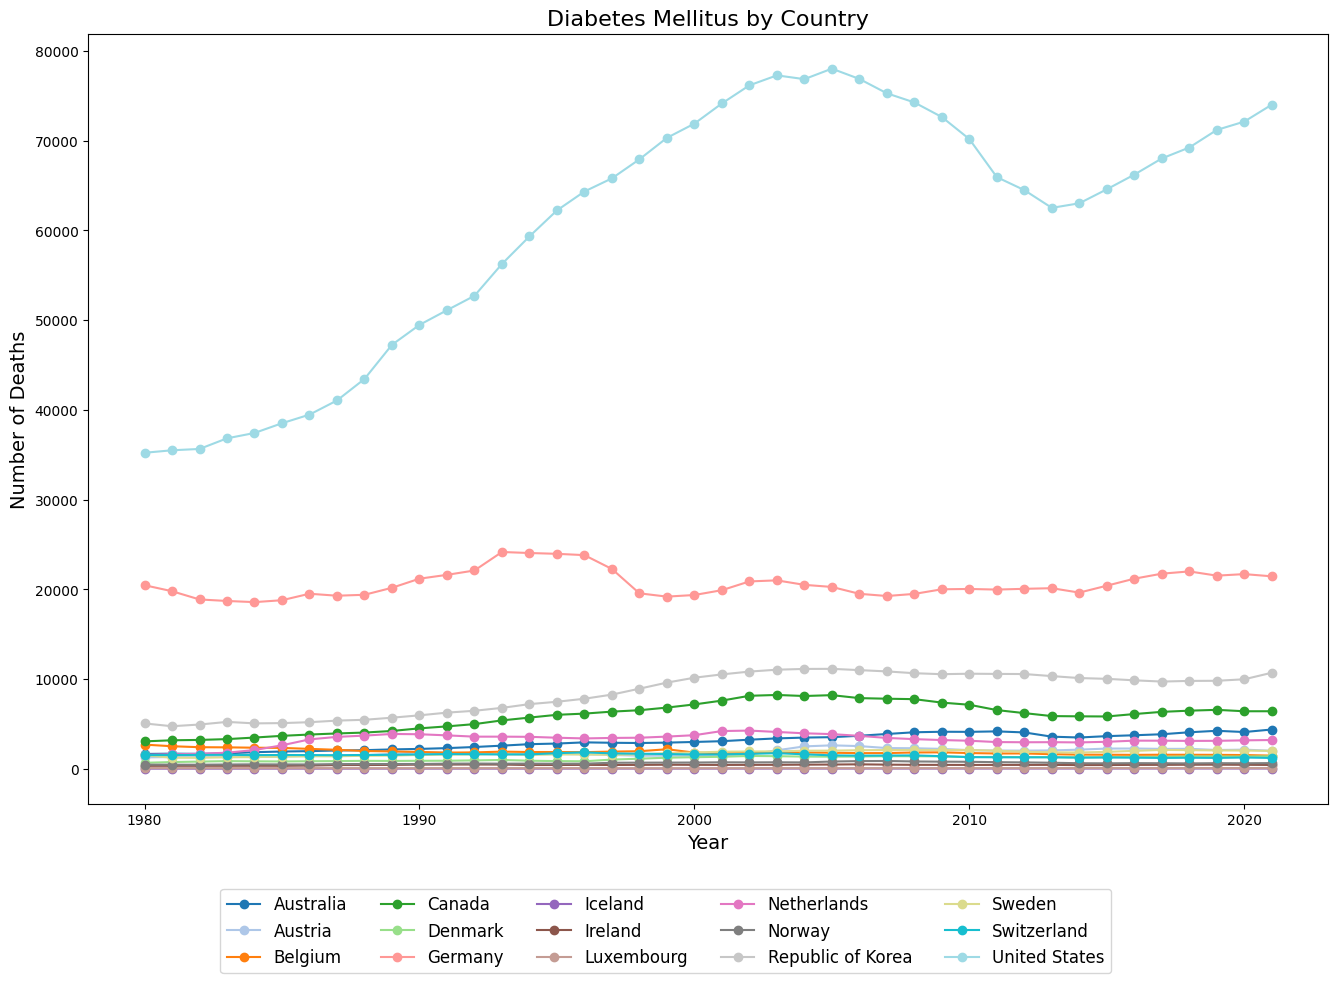

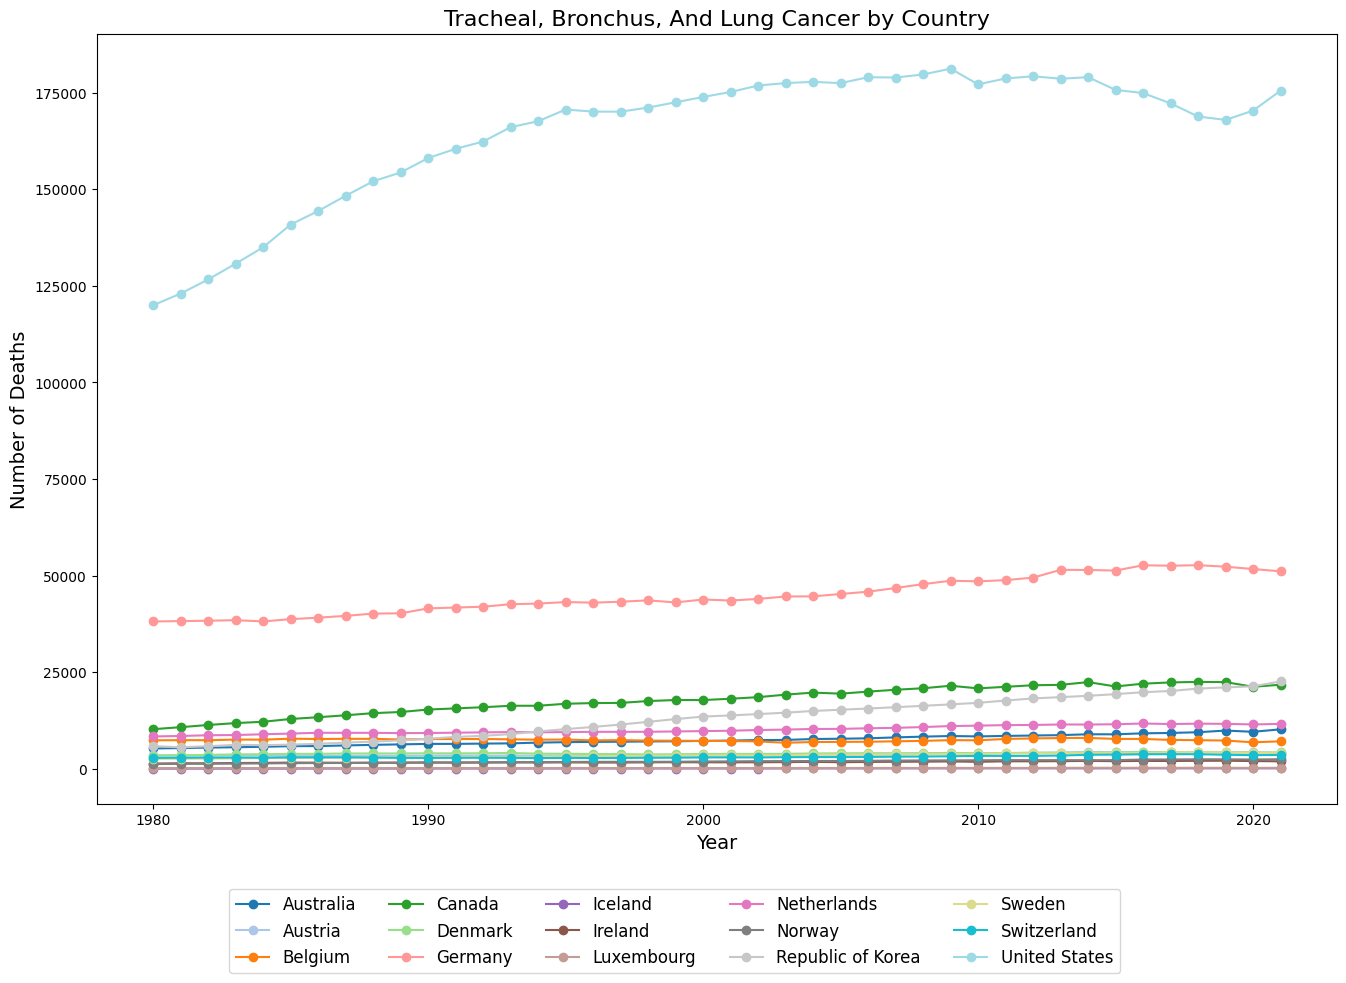

In [7]:
### Loop through causes of disease to create line plots

# Select columns in different categories for plotting
columns = ['Alcohol use disorders', 'Opioid use disorders', 'Liver cancer due to alcohol use',
             'Police conflict and executions','Road injuries', 'Self-harm',
            'Cardiovascular diseases', 'Diabetes mellitus', 'Tracheal, bronchus, and lung cancer']


# Plotting loop for each column
for i, column in enumerate(columns):
    plt.figure(figsize=(16, 10))
    
    for j, country in enumerate(wealthiest_df['Country'].unique()):
        country_data = wealthiest_df[wealthiest_df['Country'] == country]
        plt.plot(country_data['Year'], country_data[column], label=country, marker='o', color=colors[j])

    # Capitalize every word in the column name
    title_words = column.split()  # Split by spaces (default behavior)
    title_words = [word.capitalize() for word in title_words]  # Capitalize each word
    
    # Join the capitalized words back into a title string
    title = ' '.join(title_words)
    
    plt.title(f'{title} by Country', fontsize=16)  # Set the formatted title
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Deaths', fontsize=14)
    
    plt.legend(loc='upper left', bbox_to_anchor=(0.1, -0.1), ncol=5, fontsize='large')
    
    
    
    plt.show()

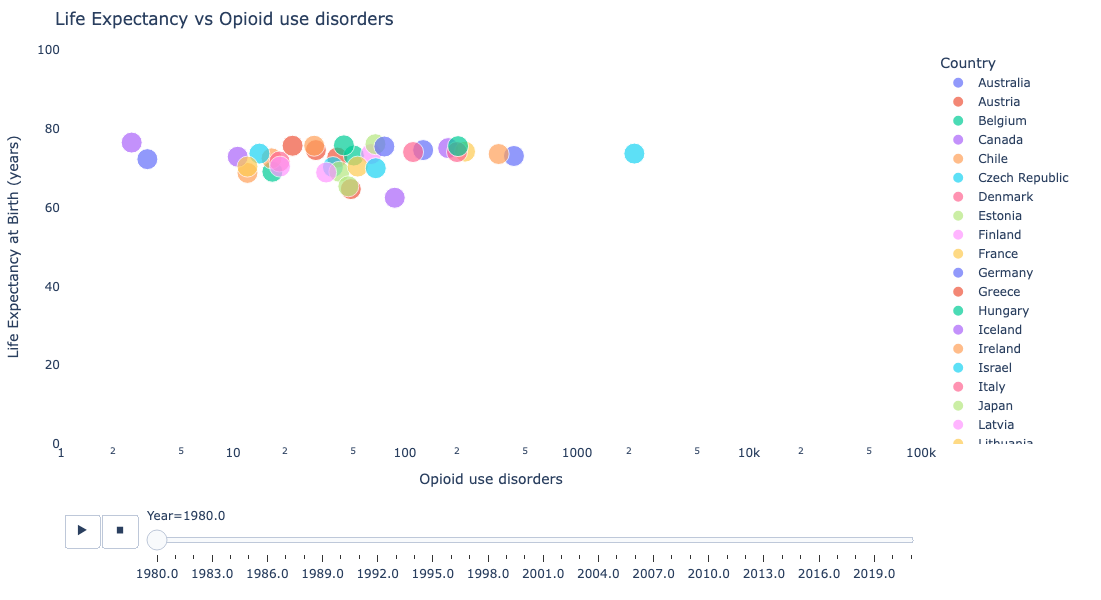

In [8]:
### Life Expectancy vs Disease over Time

# Choose cause of death
category = 'Opioid use disorders'

# Filter dataframe for years starting from 1980
filtered_1980_df = master_df[master_df['Year'] >= 1980]

# Create the scatter plot for Life Expectancy vs Alcohol use disorders
fig = px.scatter(
    filtered_1980_df,
    x=category,
    y='Life Expectancy',
    color='Country',
    animation_frame='Year',
    size_max=15,           # Set the maximum size of markers
    hover_name='Country',
    log_x=True,
    size='Year',     # Size of markers based on Population
    title=f'Life Expectancy vs {category}',
    labels={
        'Life Expectancy': 'Life Expectancy at Birth (years)',
        'Alcohol use disorders': 'Alcohol use disorders',
        'Population': 'Population (thousands)'
    }
)

# Update the layout to set the size and adjust margins
fig.update_layout(
    width=1000,      # Set the width to 1000 pixels
    height=600,      # Set the height to 600 pixels
    margin=dict(l=50, r=50, t=50, b=50),  # Adjust margins
    paper_bgcolor='white',                # Set background color
    plot_bgcolor='white',                 # Set plot background color
    yaxis=dict(range=[0, 100]),
    xaxis=dict(range=[0, 5])# Set the range of the y-axis
)

# Show the plot
fig.show()


In [9]:
# Filter dataframe for latest year
latest_df = wealthiest_df[wealthiest_df['Year'] == latest_year]

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_cord, y_cord, x_label, y_label, title):

    # Linear Regression
    (slope, intercept, rvalue, pvalue, std) = linregress(x_values, y_values)

    # Calculate regression line
    regress_values = x_values * slope + intercept

    # Scatter plot
    plt.scatter(x_values, y_values, marker='o')

    # Plot regression line
    plt.plot(x_values, regress_values, color='red')

    # Annotate the linear equation and r-value
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (x_cord, y_cord), fontsize=15, color="red")

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout() 

    # Save the figure
    #plt.savefig(output_file)

    # Print the r value
    print(f"The r^2 value is {rvalue**2}")
    
    # Show plot
    plt.show()

The r^2 value is 0.7202231730420052


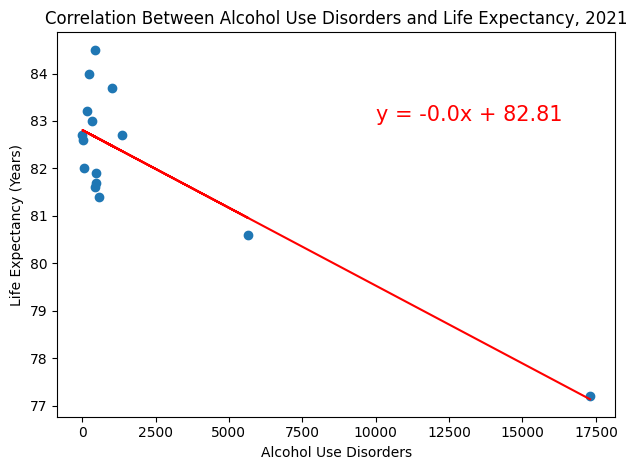

In [10]:
plot_linear_regression(latest_df['Alcohol use disorders'], latest_df['Life Expectancy'], 
                       10000, 83, 'Alcohol Use Disorders','Life Expectancy (Years)', 
                       'Correlation Between Alcohol Use Disorders and Life Expectancy, 2021')

The r^2 value is 0.6387737639276836


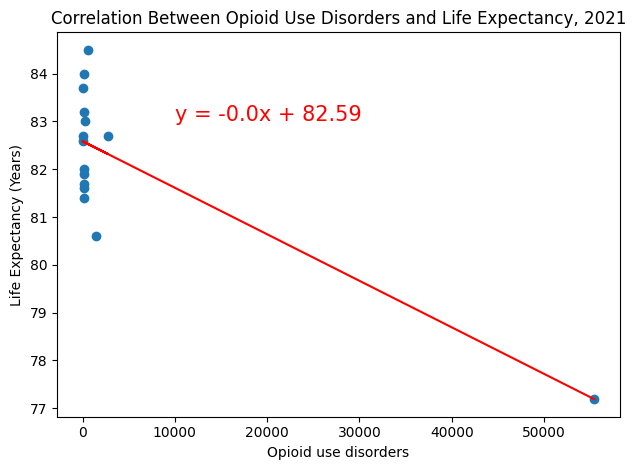

In [11]:
plot_linear_regression(latest_df['Opioid use disorders'], latest_df['Life Expectancy'], 
                       10000, 83, 'Opioid use disorders','Life Expectancy (Years)', 
                       'Correlation Between Opioid Use Disorders and Life Expectancy, 2021')

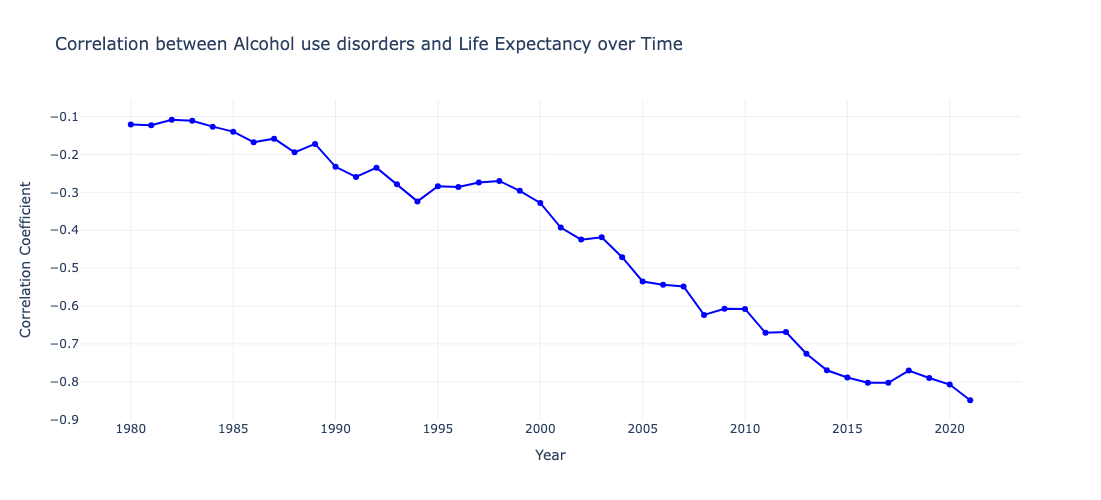

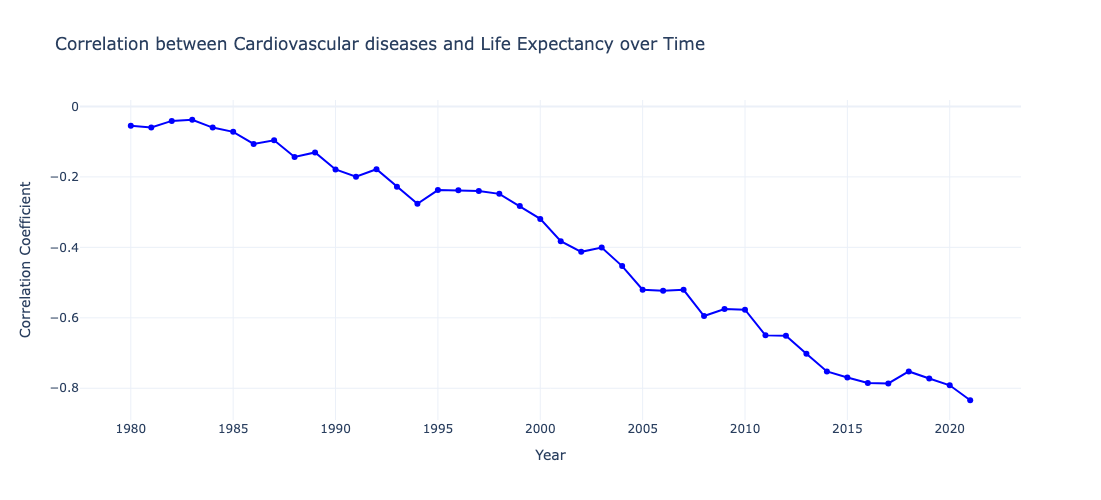

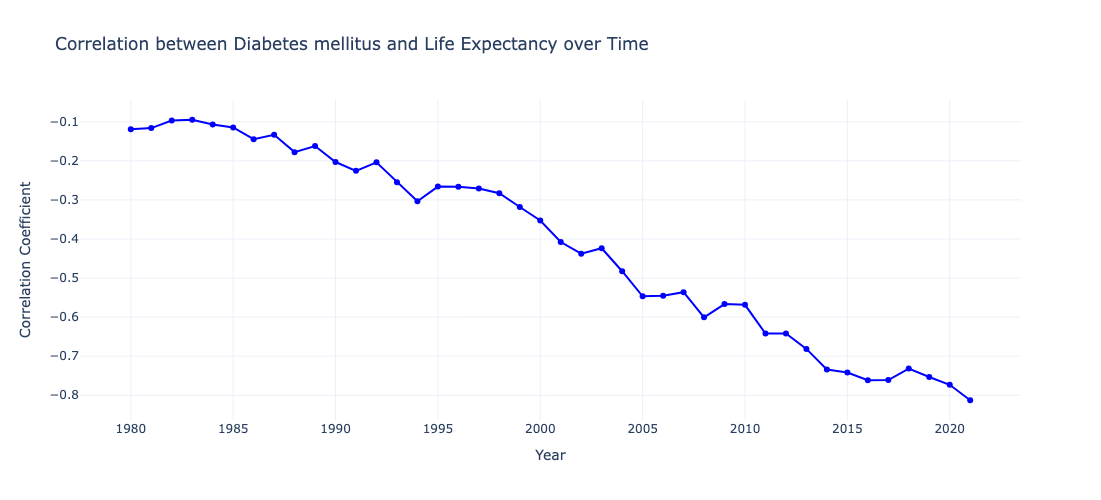

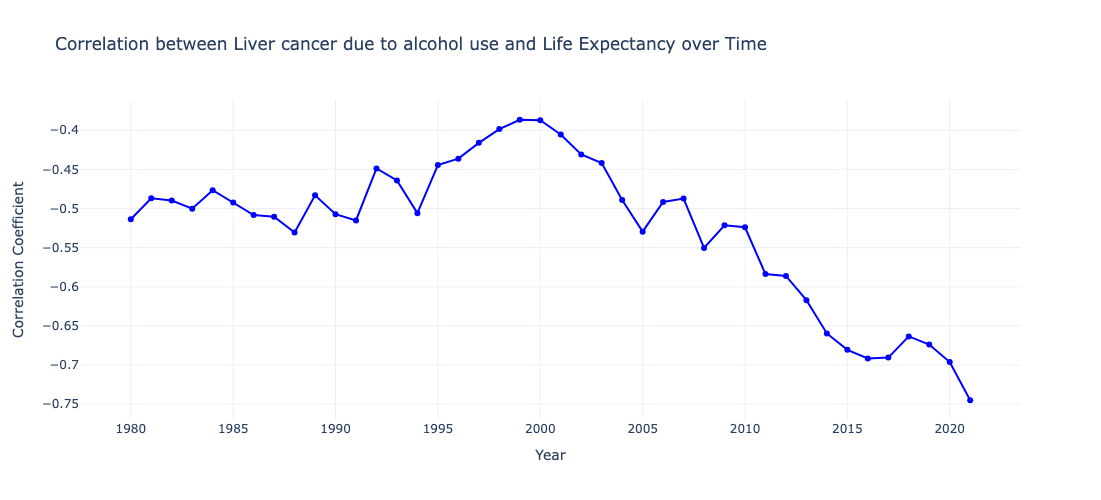

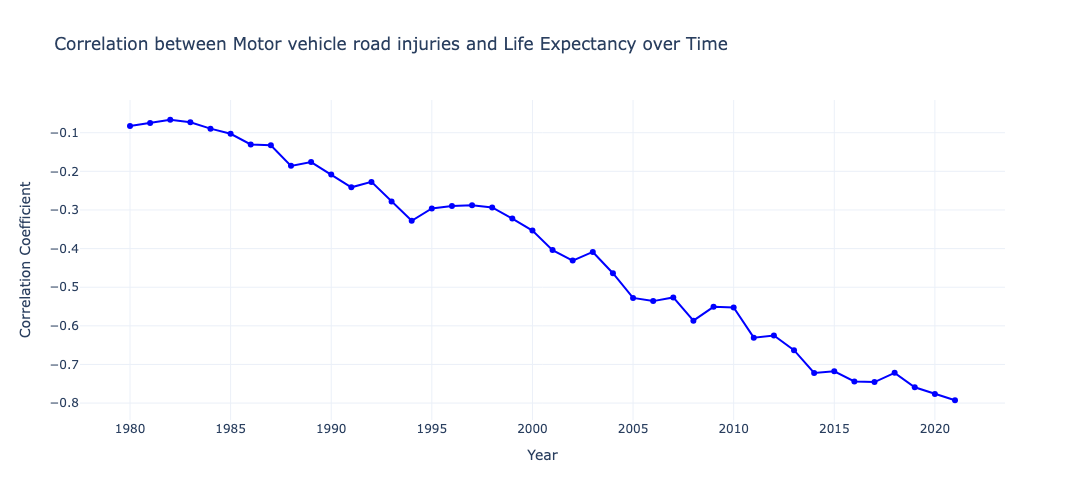

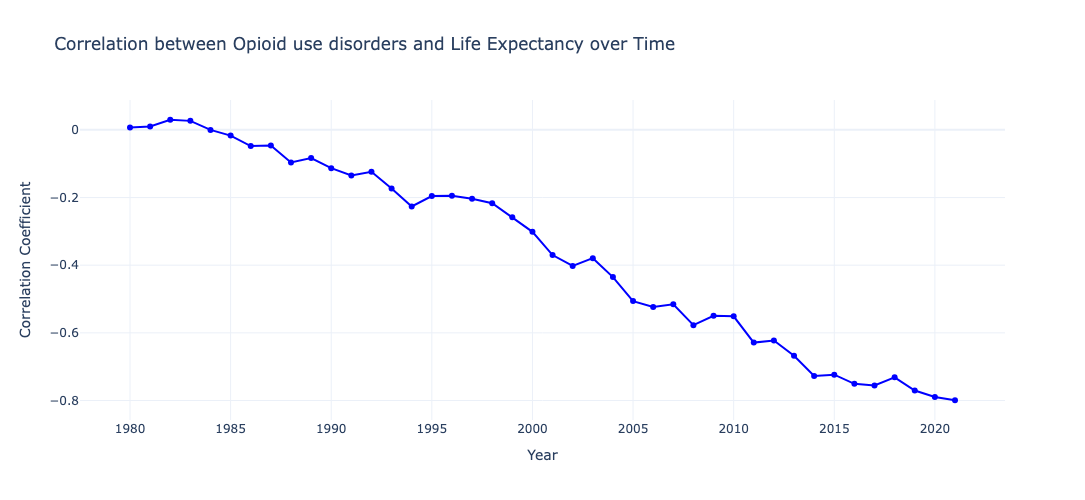

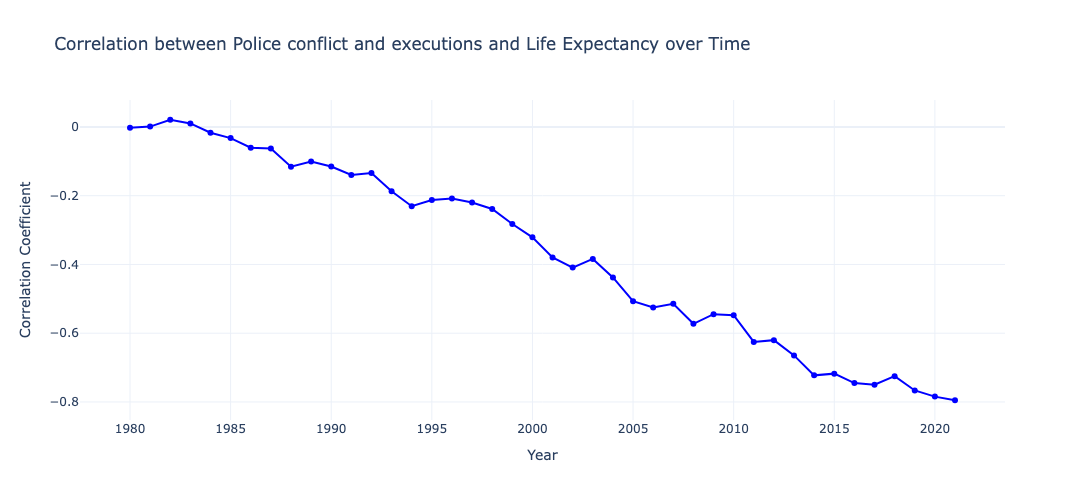

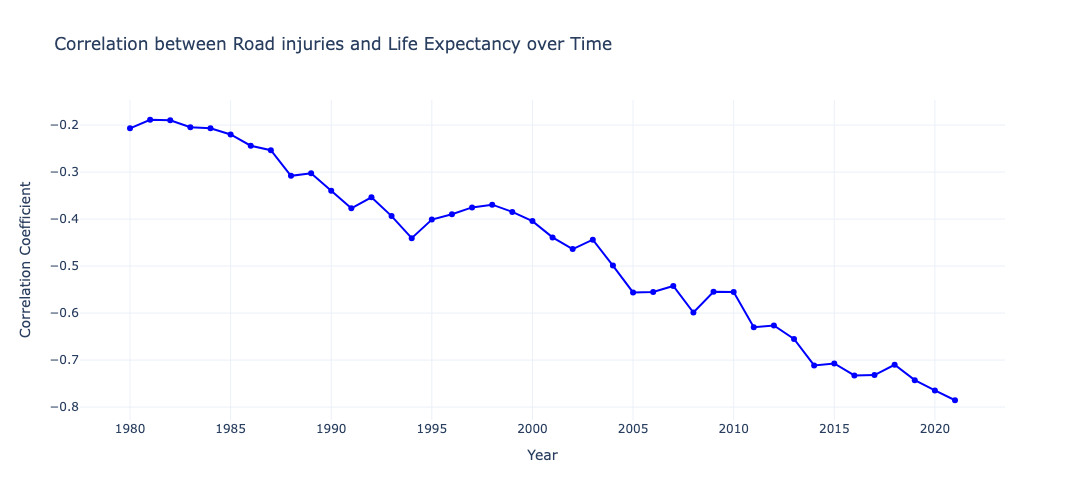

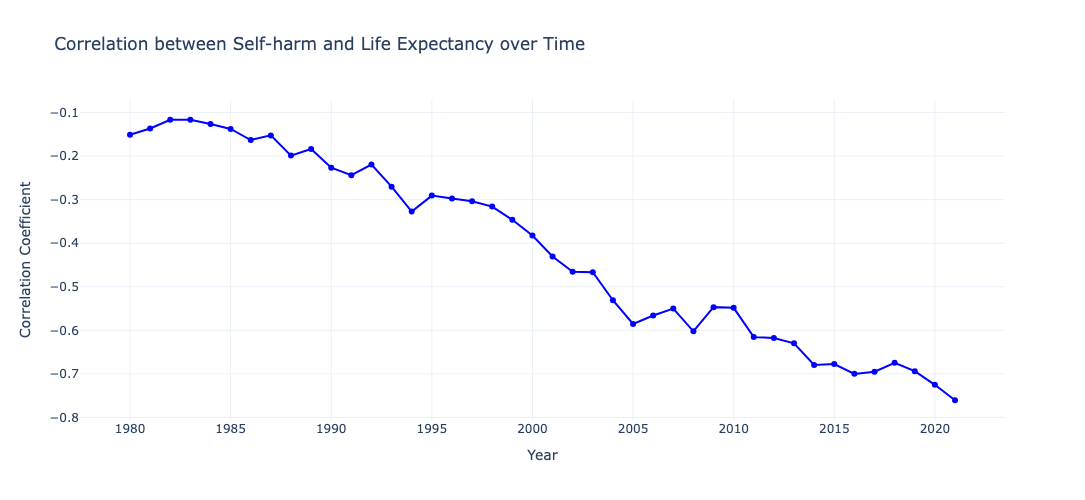

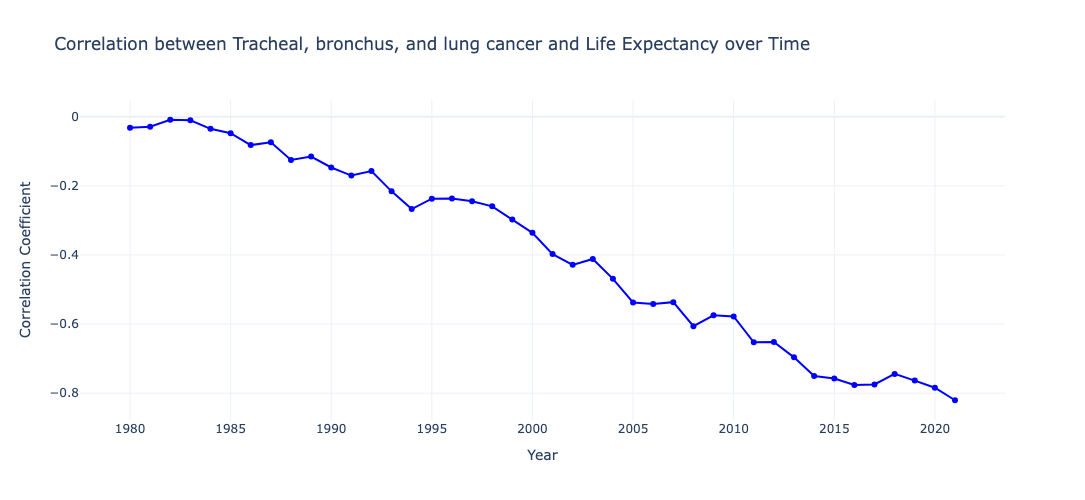

In [15]:

cause_of_death = [
    'Alcohol use disorders',
    'Cardiovascular diseases',
    'Diabetes mellitus',
    'Liver cancer due to alcohol use',
    'Motor vehicle road injuries',
    'Opioid use disorders',
    'Police conflict and executions',
    'Road injuries',
    'Self-harm',
    'Tracheal, bronchus, and lung cancer'
]

# Filter dataframe for years starting from 1980
filtered_1980_df = wealthiest_df[wealthiest_df['Year'] >= 1980]

for x_var in cause_of_death:
    correlations = []

    # Loop through each unique year in filtered_1980_df
    for year in filtered_1980_df['Year'].unique():
        # Filter the data for the current year
        df_year = filtered_1980_df[filtered_1980_df['Year'] == year]
        
        # Calculate Pearson correlation coefficient between x_var and 'Life Expectancy'
        corr, _ = st.pearsonr(df_year[x_var], df_year['Life Expectancy'])
        
        # Append the correlation coefficient to the list
        correlations.append(corr)

    # Create the figure
    fig = go.Figure()

    # Add a scatter plot of correlations over time
    fig.add_trace(go.Scatter(
        x=filtered_1980_df['Year'].unique(),
        y=correlations,
        mode='lines+markers',
        name='Correlation',
        marker=dict(color='blue')
    ))

    # Update layout
    fig.update_layout(
        title=f'Correlation between {x_var} and Life Expectancy over Time',
        xaxis_title='Year',
        yaxis_title='Correlation Coefficient',
        width=800,
        height=500,
        template='plotly_white'
    )

    # Show the plot
    fig.show()


In [13]:
cause_of_death = ['Alcohol use disorders',
                  'Cardiovascular diseases',
                  'Diabetes mellitus',
                  'Liver cancer due to alcohol use',
                  'Motor vehicle road injuries',
                  'Opioid use disorders',
                  'Police conflict and executions',
                  'Road injuries',
                  'Self-harm',
                  'Tracheal, bronchus, and lung cancer']

corr_2021 = []


for cause in cause_of_death:
    corr, _ = st.pearsonr(latest_df[cause], latest_df['Life Expectancy'])
    corr_2021.append({
    'Cause of Death': cause,
    'Correlation with Life Expectancy in 2021': corr
    })

# Create a DataFrame from corr_2021
corr_df = pd.DataFrame(corr_2021)

# Display the DataFrame
corr_df

Cause of Death  \
0                Alcohol use disorders   
1              Cardiovascular diseases   
2                    Diabetes mellitus   
3      Liver cancer due to alcohol use   
4          Motor vehicle road injuries   
5                 Opioid use disorders   
6       Police conflict and executions   
7                        Road injuries   
8                            Self-harm   
9  Tracheal, bronchus, and lung cancer   

   Correlation with Life Expectancy in 2021  
0                                 -0.848660  
1                                 -0.833986  
2                                 -0.812807  
3                                 -0.745037  
4                                 -0.792653  
5                                 -0.799233  
6                                 -0.795065  
7                                 -0.785454  
8                                 -0.760435  
9                                 -0.820607

In [14]:
# Assuming latest_year_df is your dataframe for the latest year
# Filter the dataframe to include only numeric columns if needed
numeric_columns = latest_df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
correlation_matrix

Year  Life Expectancy  \
Year                                                 NaN              NaN   
Life Expectancy                                      NaN         1.000000   
Population                                           NaN        -0.798583   
Male Population, as of 1 July (thousands)            NaN        -0.797945   
Female Population, as of 1 July (thousands)          NaN        -0.799207   
Male Life Expectancy at Birth (years)                NaN         0.969704   
Female Life Expectancy at Birth (years)              NaN         0.956249   
GDP per Capita                                       NaN         0.047926   
pop                                                  NaN        -0.798489   
Health Expenditure                                   NaN        -0.604533   
adjusted savings: education expenditure (curren...   NaN        -0.809299   
current health expenditure (% of gdp)                NaN        -0.612241   
domestic credit to private sector (% of gdp)         NaN        -0.275408   
gdp (constant 2015 us$)                              NaN        -0.801021   
labor force with advanced education (% of total...   NaN         0.417762   
labor force with intermediate education (% of t...   NaN         0.495961   
labor force with basic education (% of total wo...   NaN         0.217263   
market capitalization of listed domestic compan...   NaN         0.026394   
military expenditure (% of gdp)                      NaN        -0.366223   
out-of-pocket expenditure (% of current health ...   NaN         0.442581   
research and development expenditure (% of gdp)      NaN        -0.053689   
stocks traded, total value (% of gdp)                NaN        -0.057041   
Alcohol use disorders                                NaN        -0.848660   
Cardiovascular diseases                              NaN        -0.833986   
Diabetes mellitus                                    NaN        -0.812807   
Liver cancer due to alcohol use                      NaN        -0.745037   
Motor vehicle road injuries                          NaN        -0.792653   
Opioid use disorders                                 NaN        -0.799233   
Police conflict and executions                       NaN        -0.795065   
Road injuries                                        NaN        -0.785454   
Self-harm                                            NaN        -0.760435   
Tracheal, bronchus, and lung cancer                  NaN        -0.820607   

                                                    Population  \
Year                                                       NaN   
Life Expectancy                                      -0.798583   
Population                                            1.000000   
Male Population, as of 1 July (thousands)             0.999998   
Female Population, as of 1 July (thousands)           0.999998   
Male Life Expectancy at Birth (years)                -0.815460   
Female Life Expectancy at Birth (years)              -0.709633   
GDP per Capita                                        0.062291   
pop                                                   0.999993   
Health Expenditure                                    0.727862   
adjusted savings: education expenditure (curren...    0.993922   
current health expenditure (% of gdp)                 0.733205   
domestic credit to private sector (% of gdp)          0.632112   
gdp (constant 2015 us$)                               0.994341   
labor force with advanced education (% of total...   -0.578644   
labor force with intermediate education (% of t...   -0.492475   
labor force with basic education (% of total wo...   -0.062060   
market capitalization of listed domestic compan...    0.292878   
military expenditure (% of gdp)                       0.749107   
out-of-pocket expenditure (% of current health ...   -0.134844   
research and development expenditure (% of gdp)       0.279896   
stocks traded, total value (% of gdp)                 0.41